In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns
import helper
from collections import defaultdict

/gpfs1/home/c/p/cpetak/CA_GRN2/helper.py:160: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (Array(float64, 2, 'A', False, aligned=True), Array(float64, 2, 'A', False, aligned=True))
  next_step = windows.dot(grn)
/gpfs1/home/c/p/cpetak/CA_GRN2/helper.py:181: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (Array(float64, 2, 'C', False, aligned=True), Array(float64, 2, 'A', False, aligned=True))
  next_step = gene_vals.dot(internal_grn)


In [11]:
start_patterns = np.loadtxt("33_inputs.txt")
start_patterns = np.reshape(start_patterns, (33,22)).astype(int)
start_patterns[-1]

array([0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1])

22


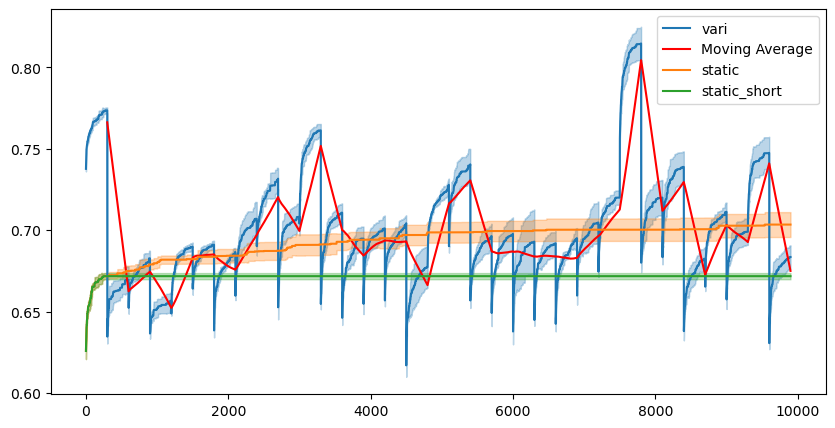

126


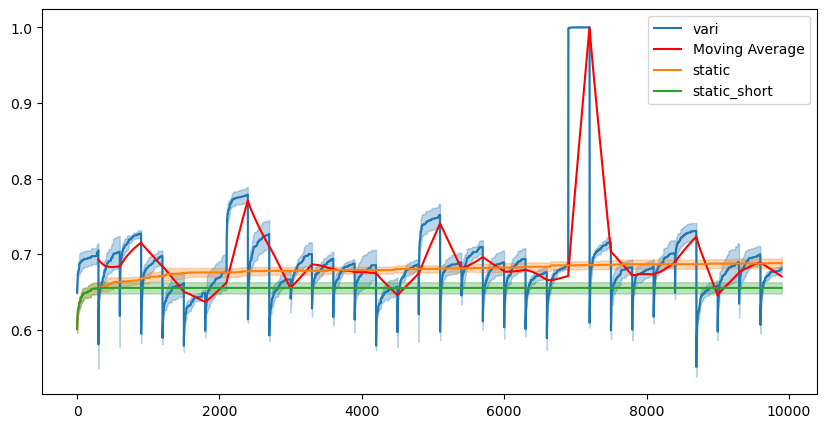

154


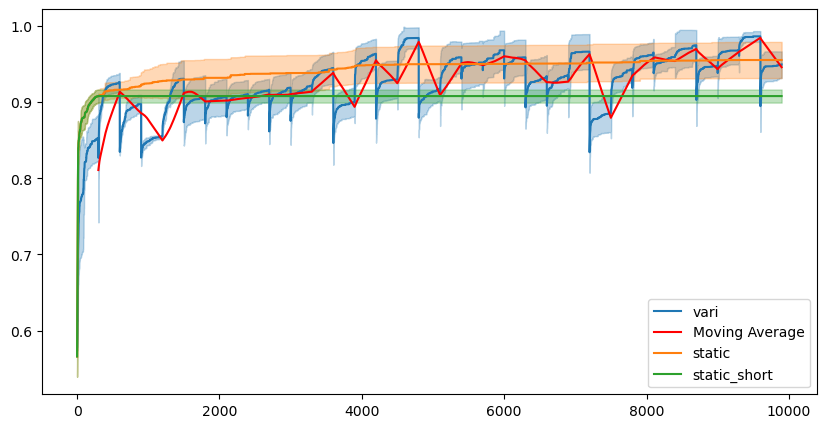

18


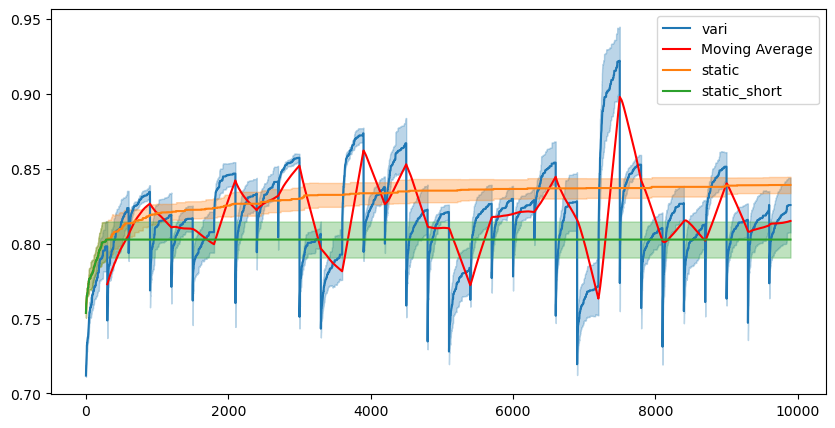

122


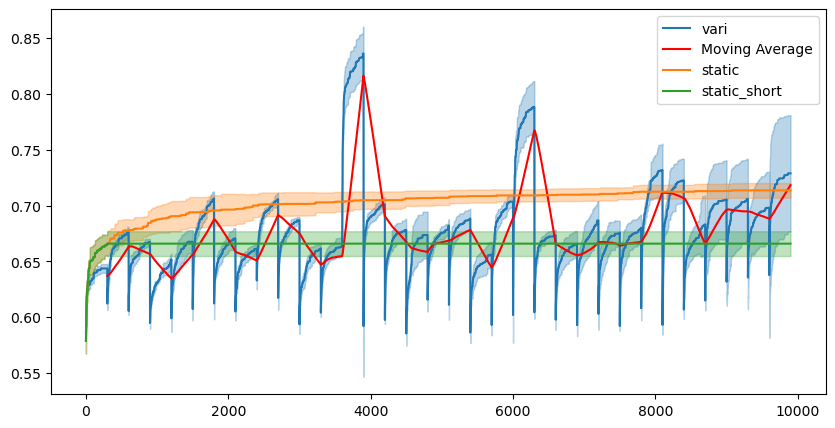

70


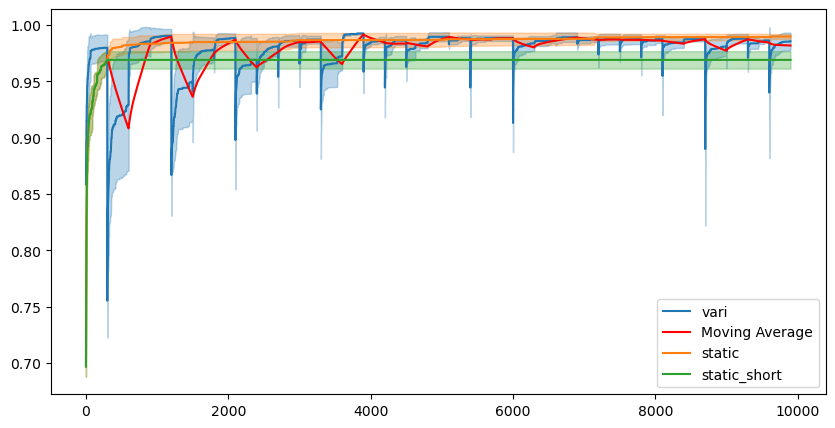

54


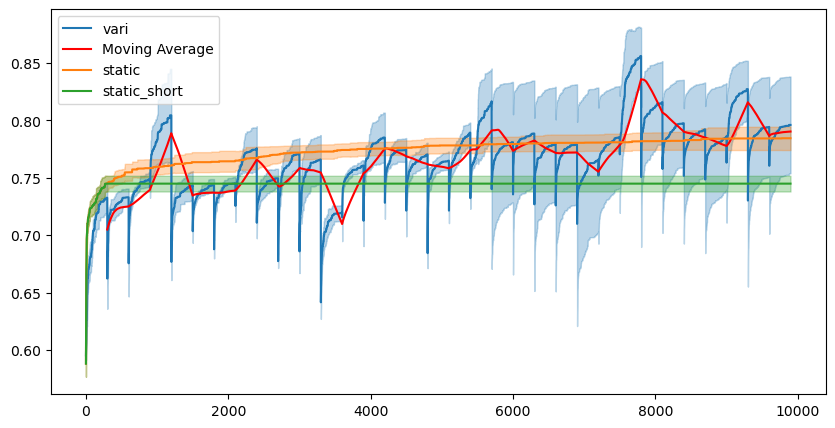

94


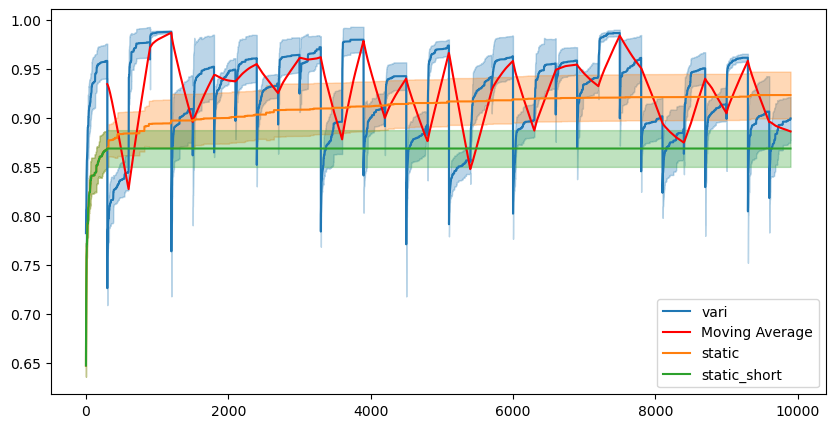

30


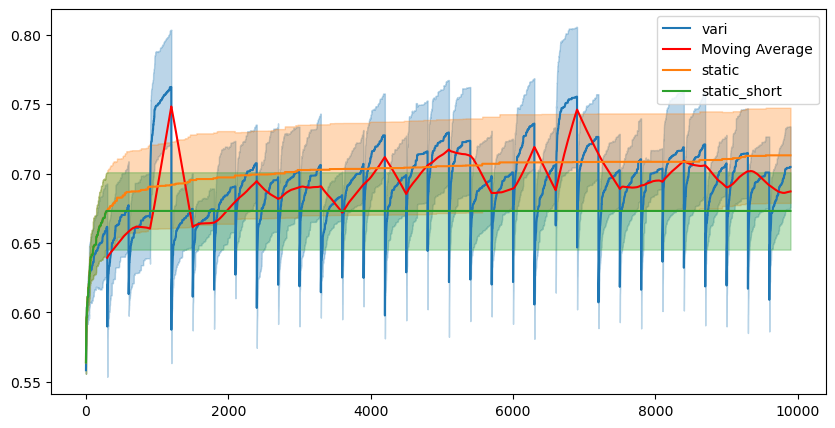

50


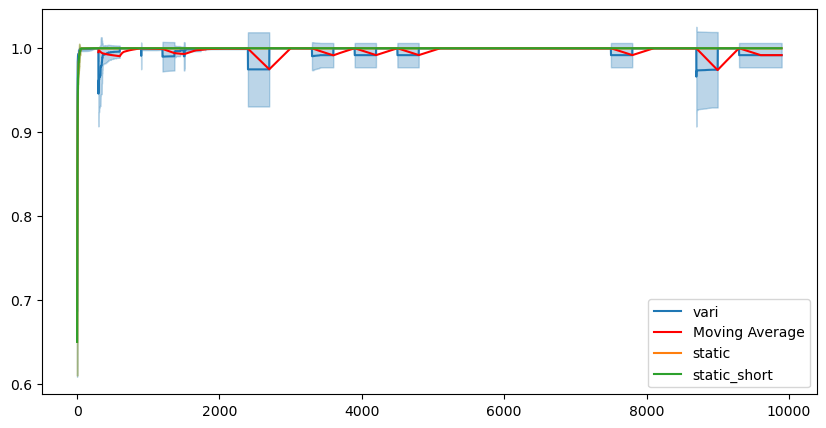

62


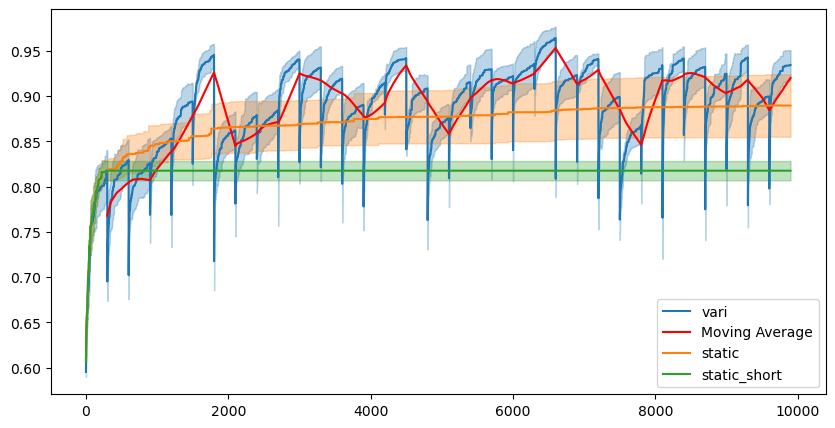

110


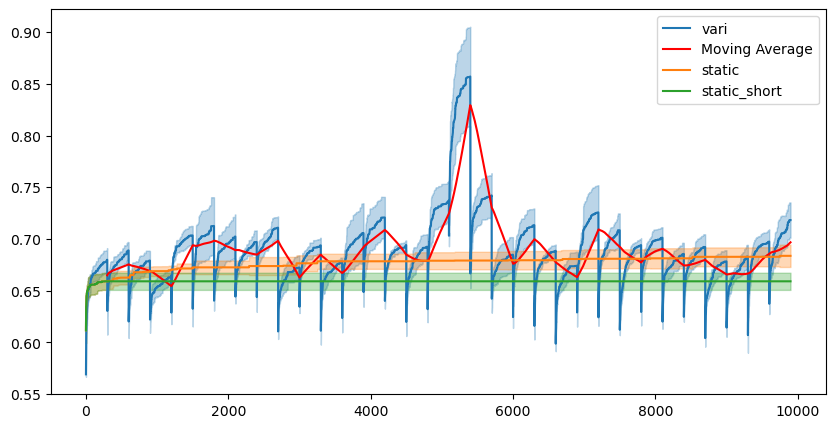

90


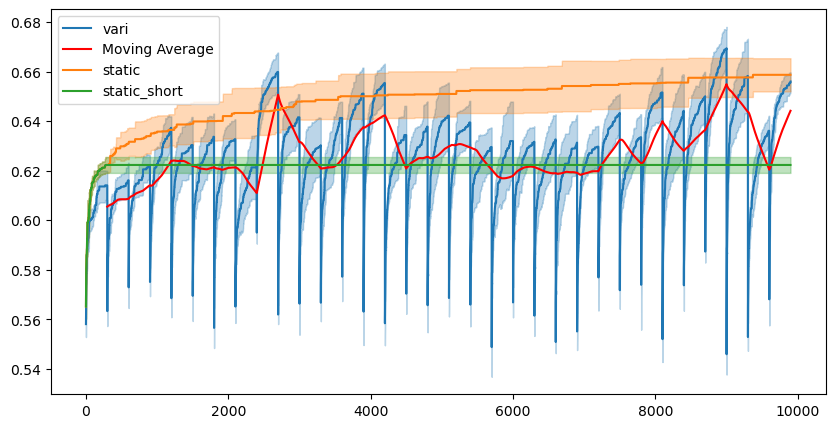

150


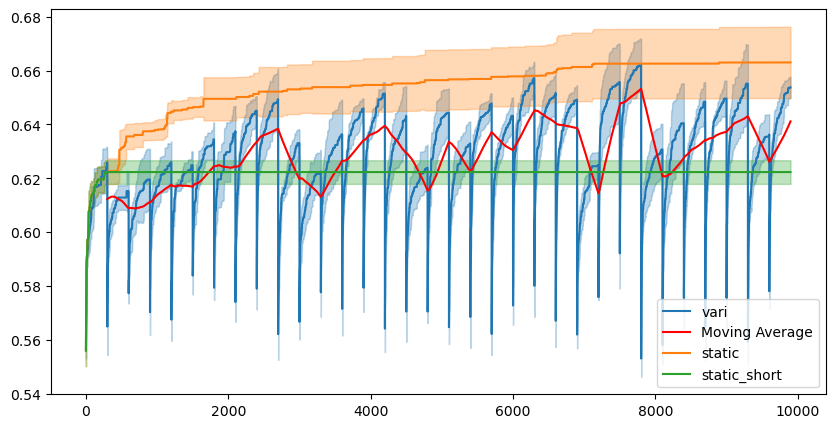

102


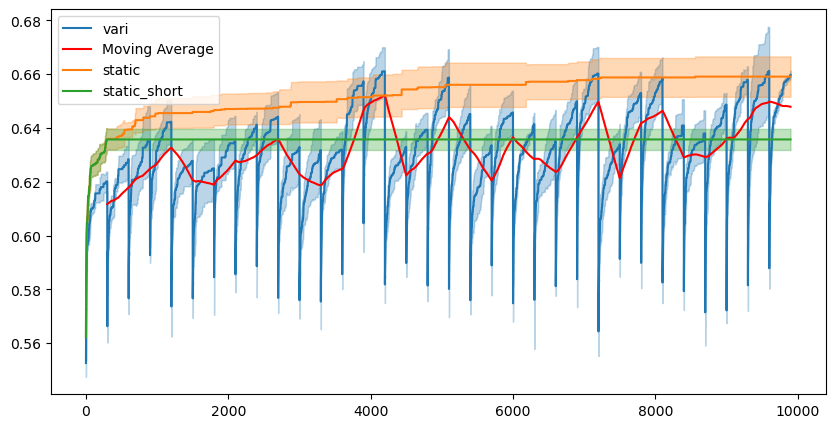

In [18]:
#root="~/Documents/GitHub/CA_GRN2/results_testing_saving/"
#root="~/Documents/GitHub/CA_GRN2/results_testing_L1_01_good/"
#root="~/all_avemaxs/"
root="~/scratch/detailed_save/"
root_new=root#"~/scratch/detailed_save/mut_blast/"
season_len = 300
metric = "maxfits"
rule = 110
seed_ints = [69904,149796]
num_reps = 5
z_value = 1.96

rules=np.array([22, 126, 154, 18, 122, 70,54,94,30,50,62,110,90,150,102])

for rule in rules:
    print(rule)

    vari_maxs=[np.loadtxt(os.path.expanduser(root_new+f"ever_changing/stats_{season_len}_{rule}-{rule}_eachdiff_{i+1}_{metric}.txt")) for i in range(num_reps)]
    vari_maxs=[v[:9899] for v in vari_maxs] #so that it is not 100 gens into a new season

    stat_maxs=[np.loadtxt(os.path.expanduser(root_new+f"ever_changing/stats_100000_{rule}-{rule}_eachdiff_{i+1}_{metric}.txt")) for i in range(num_reps)]
    stat_maxs=[v[:9899] for v in stat_maxs]

    fig, ax=plt.subplots(nrows=1,ncols=1, figsize=(10, 5),sharex=True) #sharey=True)
    mean1 = np.mean(vari_maxs, axis=0)
    stderr1 = np.std(vari_maxs, axis=0) / np.sqrt(num_reps)
    ci_upper = mean1 + z_value * stderr1
    ci_lower = mean1 - z_value * stderr1
    ax.fill_between(range(len(mean1)), ci_lower, ci_upper, alpha=0.3, color = "C0")
    ax.plot(mean1, "-", label="vari", color = "C0")

    window_size = 300
    moving_average = np.convolve(mean1, np.ones(window_size)/window_size, mode='valid')
    ax.plot(np.arange(len(mean1))[window_size - 1:], moving_average, label='Moving Average', color='red')

    #
    mean1 = np.mean(stat_maxs, axis=0)
    stderr1 = np.std(stat_maxs, axis=0) / np.sqrt(num_reps)
    ci_upper = mean1 + z_value * stderr1
    ci_lower = mean1 - z_value * stderr1
    ax.fill_between(range(len(mean1)), ci_lower, ci_upper, alpha=0.3, color = "C1")
    ax.plot(mean1, "-", label="static", color = "C1")
    #plt.xlim(0, len(season1))
    #plt.ylim(0.9,1)
    #
    shorter_static = np.array(stat_maxs)[:,:300] #if it only had 300 gens
    last_elements = shorter_static[:,-1]
    last_elements=np.tile(last_elements, (9899-300, 1)).T
    stat_maxs = np.hstack((shorter_static, last_elements))
    mean1 = np.mean(stat_maxs, axis=0)
    stderr1 = np.std(stat_maxs, axis=0) / np.sqrt(num_reps)
    ci_upper = mean1 + z_value * stderr1
    ci_lower = mean1 - z_value * stderr1
    ax.fill_between(range(len(mean1)), ci_lower, ci_upper, alpha=0.3, color = "C2")
    ax.plot(mean1, "-", label="static_short", color = "C2")

    plt.legend()
    plt.show()

22


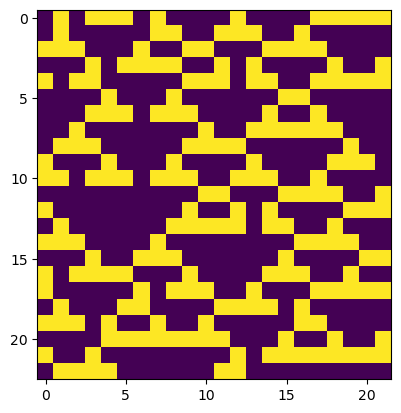

126


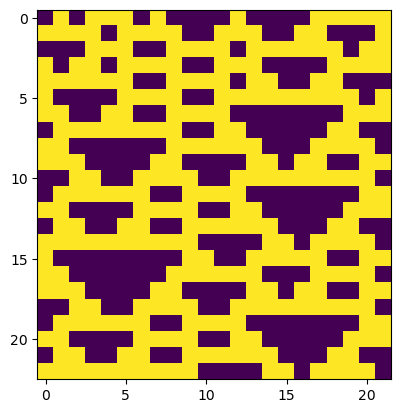

154


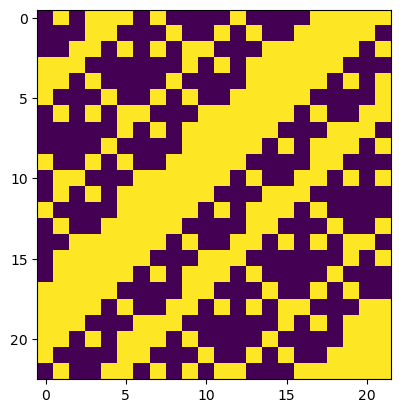

18


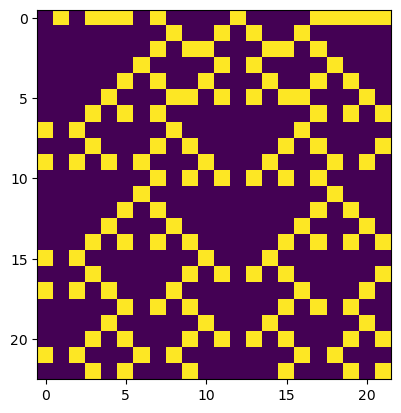

122


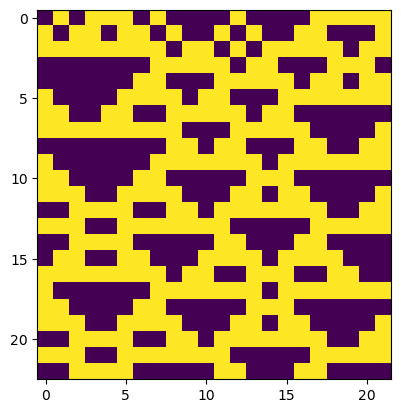

70


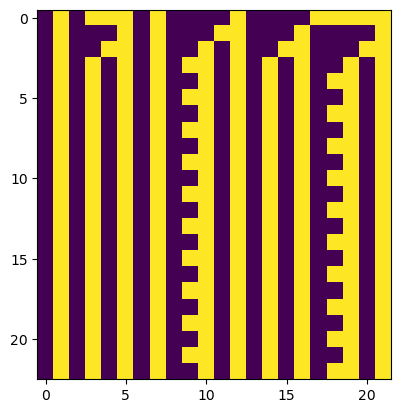

54


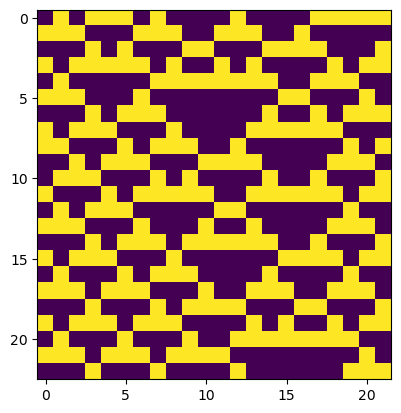

94


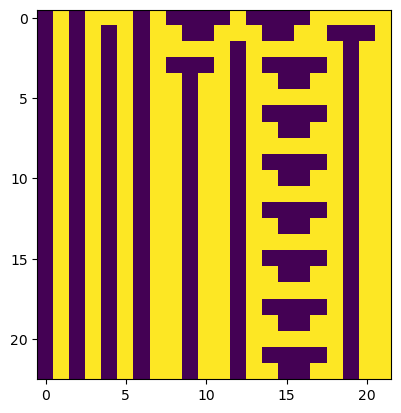

30


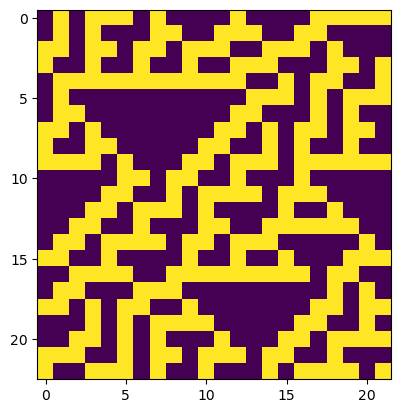

50


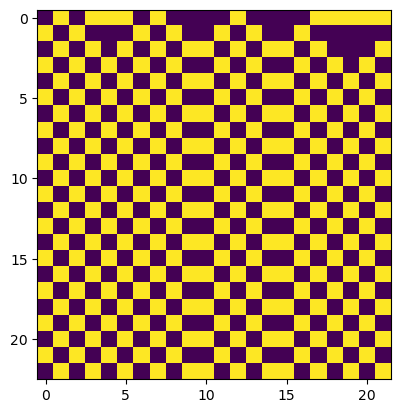

62


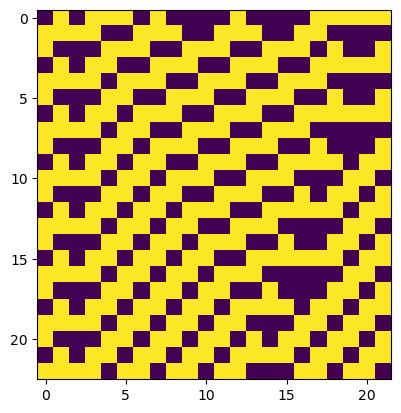

110


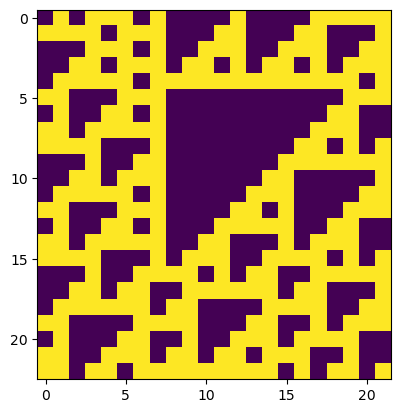

90


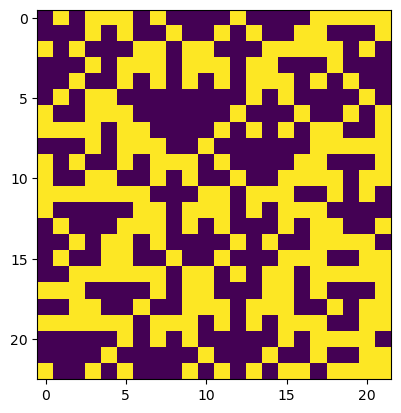

150


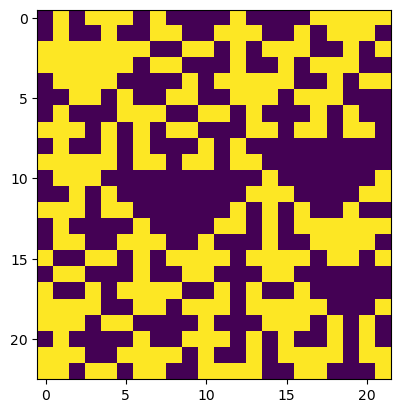

102


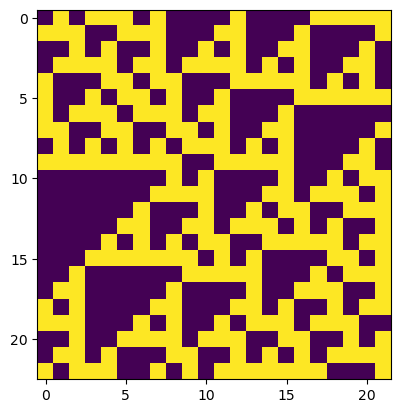

In [9]:
#Static targets:
start_pattern=np.array([0,1,0,1,1,1,0,1,0,0,0,0,1,0,0,0,0,1,1,1,1,1])
dev_steps = 22
num_cells = 22
for r in rules:
    print(r)
    target = helper.rule2targets_wrapped_wstart(r, L=dev_steps+1, N=num_cells, start_pattern=start_pattern)
    plt.imshow(target)
    plt.show()

In [21]:
root = "~/Documents/GitHub/CA_GRN2/results_testing_saving/"
avail_metrics = ["avefits","maxfits","beststd","spec_pheno_stds", "pheno_stds","geno_stds"]
metric = avail_metrics[5]
rules = [rule,rule]
output=[np.loadtxt(os.path.expanduser(root+f"stats_{season_len}_{rules[0]}-{rules[1]}_{seed_ints[0]}-{seed_ints[1]}_{i+1}_{metric}.txt")) for i in range(1)]

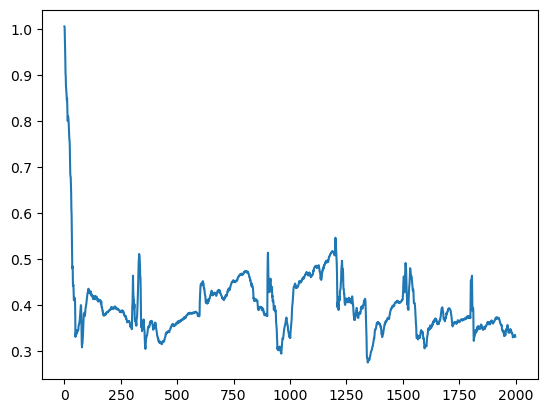

In [22]:
plt.plot(output[0])